# Week11 - Clustering Lab

* Create clusters for the following dataset
* Choose a meaningful cluster count
* Identify potential labels for each cluster

## This lab work is in collaboration of AYUSHI BHUJADE and JAINAM MAHESHKUMAR PATEL

In [1]:
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
import pandas as pd

def get_data():
    r = urllib2.urlopen("https://github.com/msaricaumbc/DS_data/blob/master/ds602/people_wiki.zip?raw=true").read()
    file = ZipFile(BytesIO(r))
    people_wiki_csv = file.open("people_wiki.csv")
    people = pd.read_csv(people_wiki_csv)
    people.drop('URI', inplace=True, axis=1)
    return people

people = get_data()
people.head()

,name,text
0,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...


# EDA

Missing values in the dataset:
name           0
text           0
text_length    0
cluster        0
dtype: int64


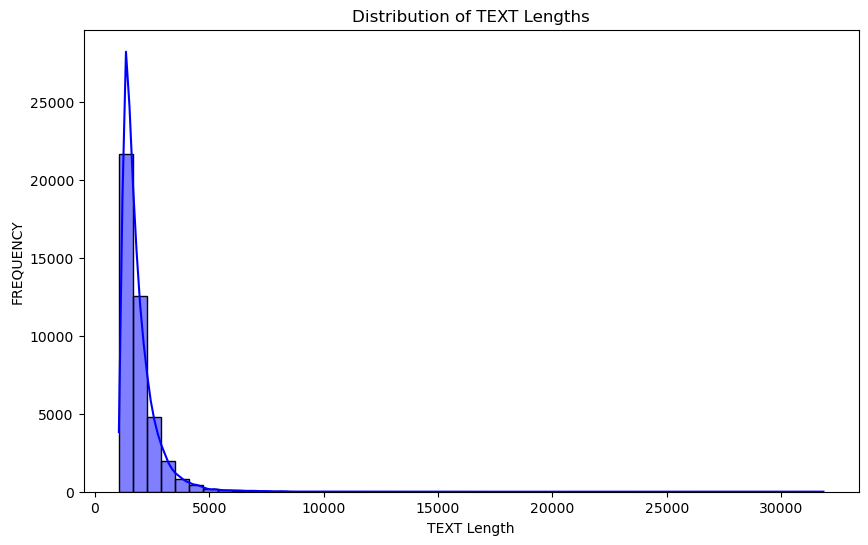

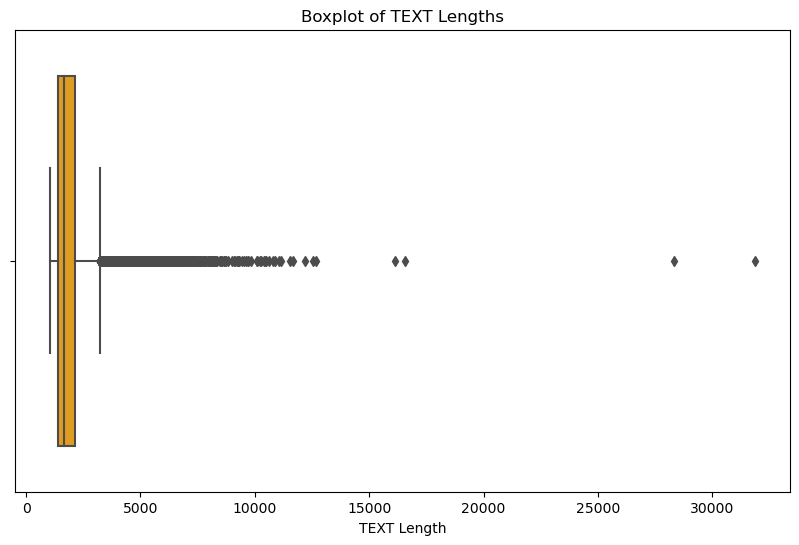

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


# here we have check for missing values....
print("Missing values in the dataset:")
print(people.isnull().sum())



# here we have tried to get distribution of text lengths....
people['text_length'] = people['text'].apply(len)


plt.figure(figsize=(10, 6))
sns.histplot(people['text_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of TEXT Lengths')
plt.xlabel('TEXT Length')
plt.ylabel('FREQUENCY')
plt.show()



# here we check for potential outliers....
plt.figure(figsize=(10, 6))
sns.boxplot(x='text_length', data=people, color='orange')
plt.title('Boxplot of TEXT Lengths')
plt.xlabel('TEXT Length')
plt.show()


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt



# here we preprocessed the text data...

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(people['text'])

X

<42786x437190 sparse matrix of type '<class 'numpy.float64'>'
	with 5847547 stored elements in Compressed Sparse Row format>

In [17]:
# here we choose a meaningful cluster count....

num_c = 5
num_c

5

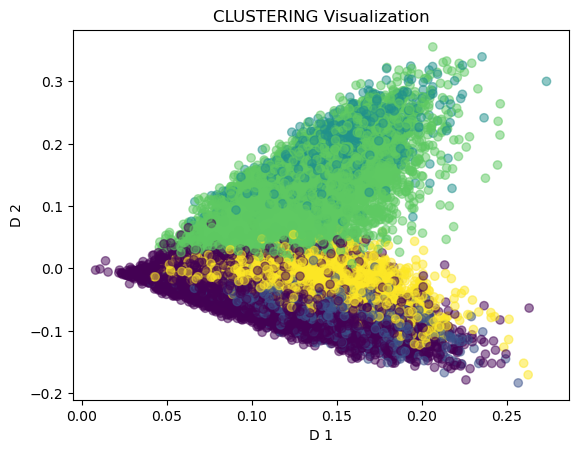

In [21]:
# here we applied K-means clustering....
kmeans = KMeans(n_clusters=num_c, random_state=42)
people['cluster'] = kmeans.fit_predict(X)

# plot for that.....
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

plt.scatter(X_svd[:, 0], X_svd[:, 1], c=people['cluster'], cmap='viridis', alpha=0.5)
plt.title('CLUSTERING Visualization')
plt.xlabel('D 1')
plt.ylabel('D 2')
plt.show()


In [23]:
# here we identified the potenital labels.....
for cluster_id in range(num_c):
    cluster_data = people[people['cluster'] == cluster_id]
    print(f"\nCluster {cluster_id + 1} - Potential Labels:")
    print(cluster_data['name'].head(5))



Cluster 1 - Potential Labels:
1         Alfred J. Lewy
3    Franz Rottensteiner
5          Sam Henderson
7        Trevor Ferguson
9           Cathy Caruth
Name: name, dtype: object

Cluster 2 - Potential Labels:
14    David Chernushenko
32       Mindaugas Murza
39          Gary Emineth
42            Sylvie Roy
52    Robert N. Chatigny
Name: name, dtype: object

Cluster 3 - Potential Labels:
33                      Bob Reece
176     Arturo J. Marcano Guevara
177                Cam Cairncross
182    Mike P%C3%A9rez (baseball)
245                    Jeoff Long
Name: name, dtype: object

Cluster 4 - Potential Labels:
0                       Digby Morrell
17    Paddy Dunne (Gaelic footballer)
21                      Ceiron Thomas
22                       Adel Sellimi
25                        Vic Stasiuk
Name: name, dtype: object

Cluster 5 - Potential Labels:
2      Harpdog Brown
4             G-Enka
6      Aaron LaCrate
8       Grant Nelson
15    Joerg Steineck
Name: name, dtype: object
